In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras import models
from keras import layers
from keras.utils import to_categorical
import os

Using TensorFlow backend.


In [3]:
def generate(X, Y, steps):
    x, y = [], []
    for i in range(0, len(X)):
        end_index = i+steps
        if end_index > len(X)-1:
            break
        else:
            x.append(X[i:end_index])
            y.append(Y[end_index])
    return x, y

def categorical_y(Y):
    y = [0]
    for i, _ in enumerate(Y[1:]):
        if Y[i] > Y[i-1]:
            y.append(1)
        else:
            y.append(0)
    return y

#function for managing models version
def confirm_model_version():
    model_version = input("Insert Model Version\n")
    if input("Confirm Model Version '%s'" % model_version) == "y":
        if model_version not in os.listdir("./models/"):
            os.mkdir("./models/%s" % model_version)
        return model_version
    else:
        confirm_model_version()

def prepare_data(df):
    df.pop("Date")

    features = df.columns
    label = df.columns[3]    

    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

    x = np.array(df[features])
    y = np.array(df[label])

    x, y = generate(x, y, 5)
    y = categorical_y(y)
    x, y = np.asarray(x), np.asarray(y)
    x = x.reshape(x.shape[0], x.shape[1], len(features))
    y = to_categorical(y)
    
    return x, y

In [4]:
MODEL_PATH = "./models/normalized_categorical_0/model.h5"
model = models.load_model(MODEL_PATH)

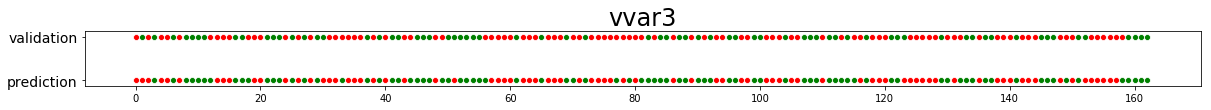

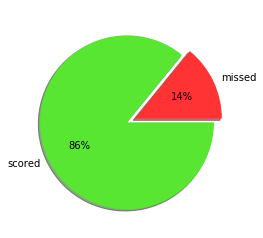

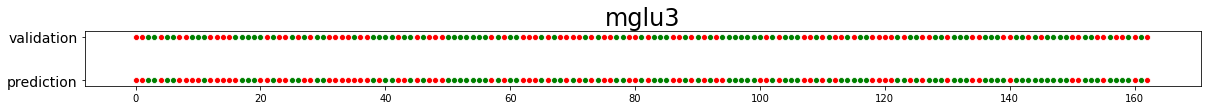

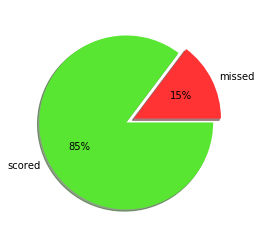

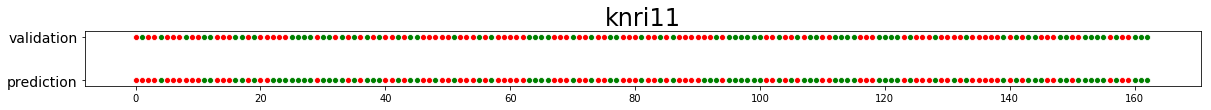

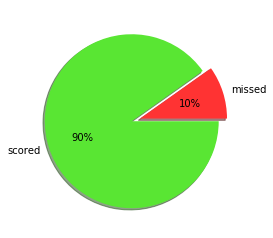

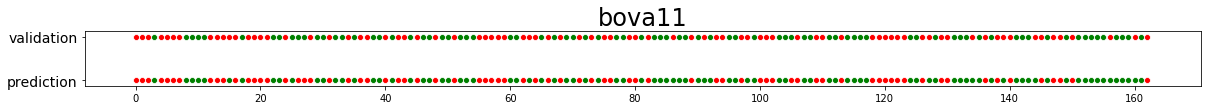

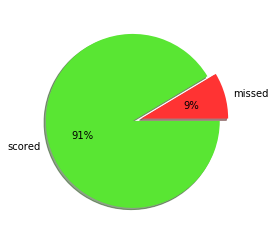

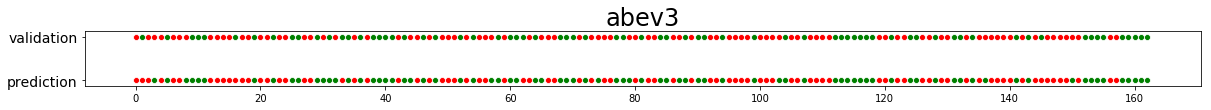

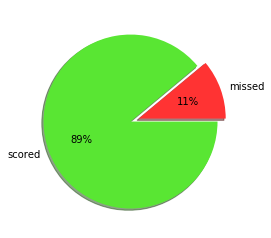

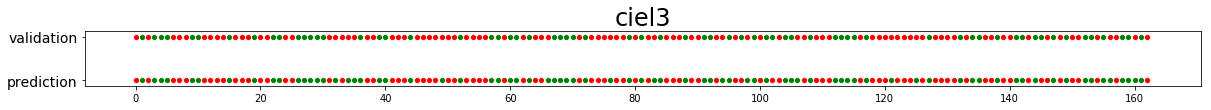

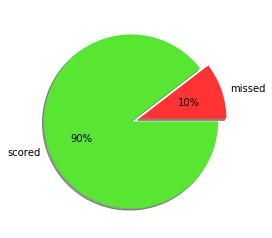

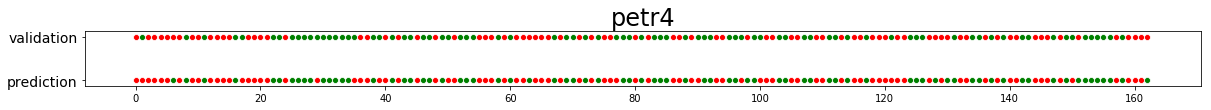

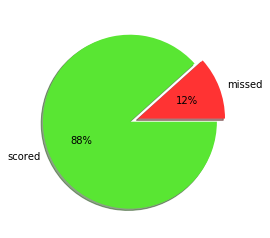

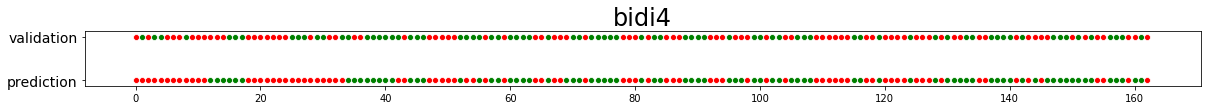

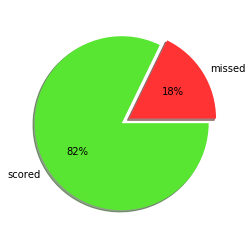

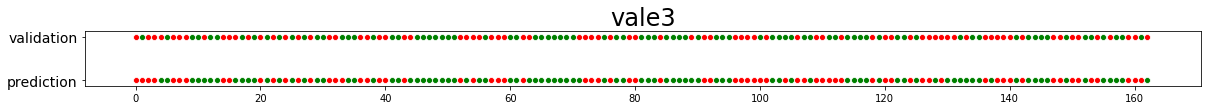

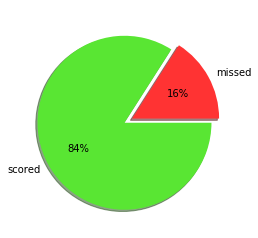

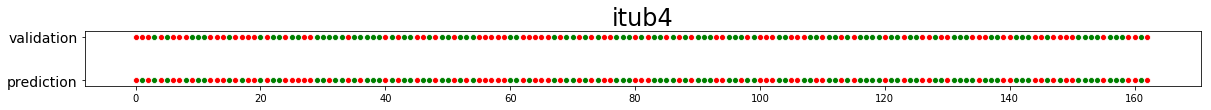

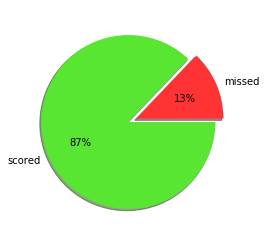

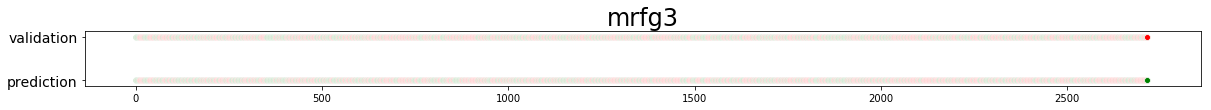

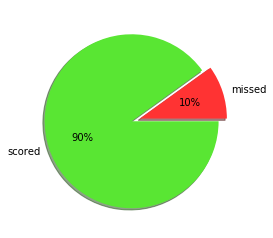

In [252]:
for dataset in os.listdir("./datasets/"):
    df = pd.read_csv("./datasets/%s" % dataset)

    score = []
    x, y = prepare_data(df)
    predictions = to_categorical(model.predict_classes(x))
    binary_prediction, binary_y = [], []
    
    plt.figure(figsize=(20,1))
    
    for i, prediction in enumerate(predictions):
        
        if y[i][0] == 1 : validation_color="r"
        else : validation_color="g"
            
        if prediction[0] == 1 : prediction_color="r"
        else : prediction_color="g"
            
        #plot prediction data point
        sns.scatterplot(x=[i], y=["prediction"], color=prediction_color)
    
        #plot validation data point
        sns.scatterplot(x=[i], y=["validation"], color=validation_color)
        
        if prediction[0] == y[i][0]:
            score.append(1)
        else:
            score.append(0)
            

    plt.title("%s" % dataset.replace(".csv", ""), fontsize=24)
    plt.yticks(fontsize=14)
    plt.show()
            
    score_total = [score.count(0), score.count(1)]
    score_labels = ["missed", "scored"]
    plt.pie(score_total, explode=[0,.1], colors=[(1, .2, .2), (.35, .9, .2)], labels=score_labels, shadow=True,  autopct="%.0f%%", radius=1)
    plt.show()
    
    print()
    print()